**Deep Learning**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Q1** Implemente uma regressão **linear** nos dados ```Simple linear regression.csv``` usando apenas operações algébricas disponíveis no ```numpy```.

# Q1

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

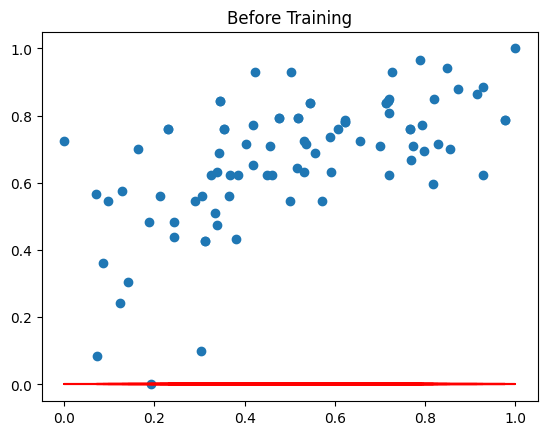

Fold 1, Final Cost: 0.02173691015356897


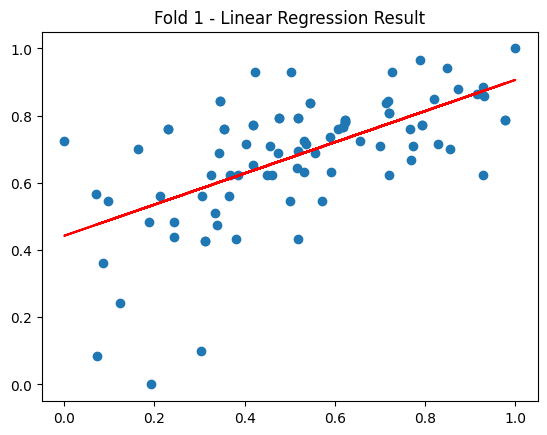

Fold 2, Final Cost: 0.022026978444661612


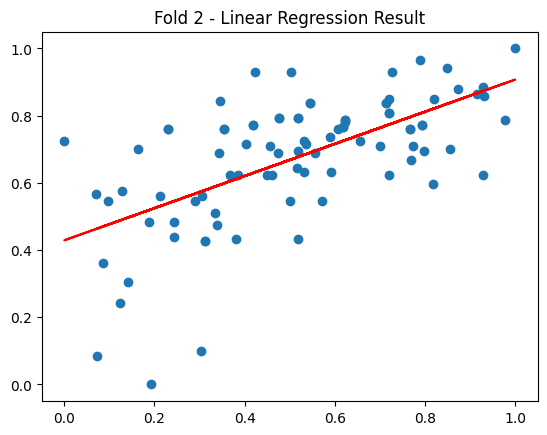

Fold 3, Final Cost: 0.0215051982126427


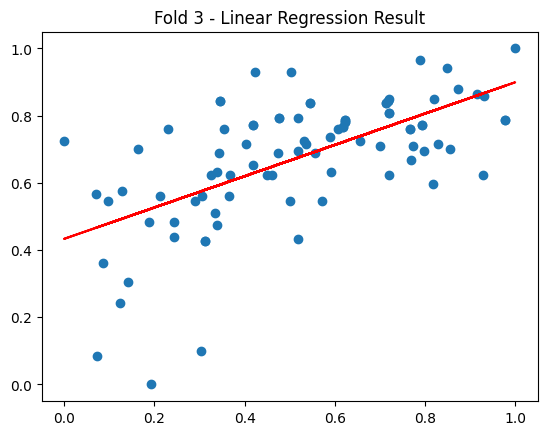

Fold 4, Final Cost: 0.014420677130739294


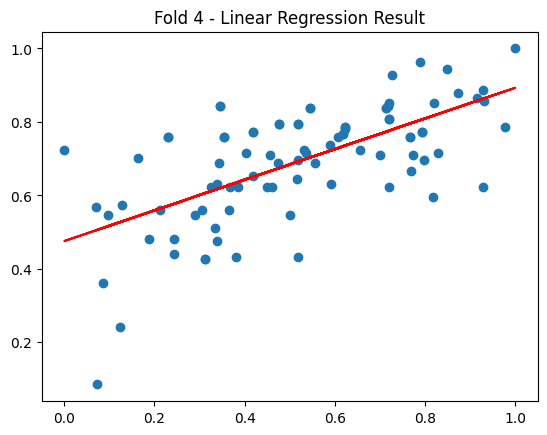

Fold 5, Final Cost: 0.01888407691747632


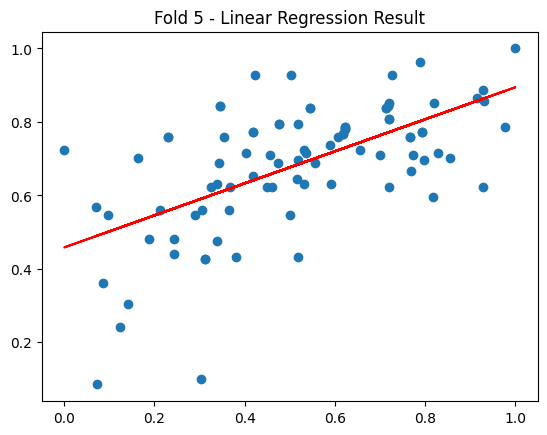

In [83]:
# Carregar os dados
data = pd.read_csv('Simple linear regression.csv')

X = data['SAT'].values
y = data['GPA'].values

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X.reshape(-1, 1)).flatten()
# reshape(-1, 1) tranforma em uma array bidimensional com uma única coluna (forma (n, 1)); onde n é o número de elementos. É feito pois é necessário pra normalização
# flatten() converte esse array bidimensional de volta para uma forma unidimensional (n,)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

learning_rate = 0.1
epochs = 3000

def compute_cost(X, y, m, b):
    total_cost = 0
    N = len(X)
    for i in range(N):
        total_cost += (y[i] - (m * X[i] + b)) ** 2
    return total_cost / N

def gradient_descent(X, y, m, b, learning_rate, epochs):
    N = len(X)
    cost_history = []
    m_values = []
    b_values = []

    for epoch in range(epochs):
        m_gradient = 0
        b_gradient = 0

        for i in range(N):
            m_gradient += -(2/N) * X[i] * (y[i] - (m * X[i] + b))
            b_gradient += -(2/N) * (y[i] - (m * X[i] + b))

        m -= (learning_rate * m_gradient)
        b -= (learning_rate * b_gradient)

        # Armazenar o custo e os valores de m e b em cada época
        cost = compute_cost(X, y, m, b)
        cost_history.append(cost)
        m_values.append(m)
        b_values.append(b)

    return m, b, cost_history, m_values, b_values

folds = 5

# Inicializar os parâmetros m (slope) e b (intercept)
m = 0
b = 0
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1)
plt.scatter(X_train, y_train)
plt.plot(X_train, m * X_train + b, color='red')
plt.title(f'Before Training')
plt.show()

for fold in range(folds): 
    # Separar os dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1)
    
    # Executar Gradiente Descendente
    m, b, cost_history, m_values, b_values = gradient_descent(X_train, y_train, m, b, learning_rate, epochs)

    # Exibir o custo final para este fold
    print(f'Fold {fold + 1}, Final Cost: {cost_history[-1]}')
    
    # Plotar o gráfico final para este fold
    plt.scatter(X_train, y_train)
    plt.plot(X_train, m * X_train + b, color='red')
    plt.title(f'Fold {fold + 1} - Linear Regression Result')
    plt.show()

# Q2

**Q2** Utilize **Regressão Logística** para atacar o problema de classificação de câncer de pulmão disponível da pasta ```breast+cancer+wisconsin+original```.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

# Carregando o dataset
dataset = pd.read_csv(url, names=column_names)

# Excluindo a coluna 'id'
dataset.drop(['id'], axis=1, inplace=True)

# Convertendo a coluna 'diagnosis' para valores binários (B = 0, M = 1)
dataset['diagnosis'] = dataset['diagnosis'].map({'B': 0, 'M': 1})

# Dividindo as variáveis independentes (X) e dependentes (y)
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

# Padronizando as features para a regressão
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo o conjunto de dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Inicializando e treinando o modelo de Regressão Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = log_reg.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibindo os resultados
print(f"Acurácia: {accuracy * 100:.2f}%")
print("\nMatriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(class_report)

Acurácia: 98.25%

Matriz de Confusão:
[[106   2]
 [  1  62]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [59]:
import numpy as np

# Função sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Função de custo (log loss)
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = (-1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return cost

# Gradiente descendente
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient

        # Armazenando o custo a cada iteração
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f'Iteração {i}, Custo: {cost}')

    return weights, cost_history

# Previsão
def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5

# Preparando os dados
X_train_manual = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Adiciona o termo de bias (1s)
X_test_manual = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Para o conjunto de teste
y_train_manual = y_train.values  # Convertendo para array NumPy
y_test_manual = y_test.values

# Inicializando os pesos com zeros
weights = np.zeros(X_train_manual.shape[1])

# Definindo hiperparâmetros
learning_rate = 0.01
iterations = 1000

# Treinando o modelo com gradiente descendente
weights, cost_history = gradient_descent(X_train_manual, y_train_manual, weights, learning_rate, iterations)

# Fazendo previsões no conjunto de teste
y_pred_manual = predict(X_test_manual, weights)

# Calculando a acurácia
accuracy_manual = np.mean(y_pred_manual == y_test_manual) * 100

# Exibindo os resultados
print(f"Acurácia: {accuracy_manual:.2f}%")


Iteração 0, Custo: 0.6741846405075865
Iteração 100, Custo: 0.254403137041227
Iteração 200, Custo: 0.19332007997630474
Iteração 300, Custo: 0.16567672525441807
Iteração 400, Custo: 0.1492632719078829
Iteração 500, Custo: 0.13814212824511074
Iteração 600, Custo: 0.12997903888149953
Iteração 700, Custo: 0.12365789608760899
Iteração 800, Custo: 0.11857338097423677
Iteração 900, Custo: 0.11436630857839299
Acurácia: 98.83%


Função sigmoide: É usada para converter o valor linear (a soma ponderada dos inputs) para uma probabilidade entre 0 e 1.<br>
Função de custo: Calcula o erro total entre as previsões e os rótulos reais. Aqui, usamos a entropia cruzada (log loss).<br>
Gradiente descendente: Ajusta os pesos para minimizar a função de custo, passo a passo, utilizando a derivada da função de custo em relação aos pesos.<br>
Previsão: Se o valor da função sigmoide for maior ou igual a 0,5, prevemos a classe 1 (maligno), caso contrário, classe 0 (benigno).

# Q3

**Q3** O arquivo ```dataset.npy``` (também disponibilizado em ```CSV```) contém amostras malucas de 2 classes ($c_1$ e $c_2$) cujos rótulos são '0' e '1'. O código abaixo pode ser usado para carregar essas variáveis. Seu desafio consiste em desenvolver um modelo composto de apenas um neurônio (perceptron) que utilize apenas ```numpy``` (dica: pode-se utilizar engenharia de características baseadas em funções não-lineares).

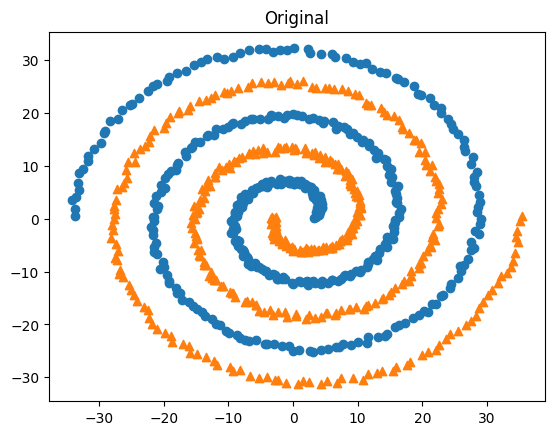

In [66]:
c1_x1, c1_x2, c2_x1, c2_x2 = np.load('dataset.npy')

plt.scatter(c1_x1, c1_x2, marker='o')
plt.scatter(c2_x1, c2_x2, marker='^')
plt.title('Original')
plt.show()